In [1]:
import pandas as pd
r = pd.read_csv(r'C:\Users\niki_\Google Drive\GRAD SCHOOL\Papers\KGFarm-LFE\Cleaning\heart.csv')

In [2]:
import os
import pandas as pd
os.chdir('../../')

from operations.api import KGFarm
kgfarm = KGFarm()

(KGFarm is running in Human in the loop mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


In [3]:
f1array= []

In [8]:
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
proportion_missing = 0.1

scanning missing values


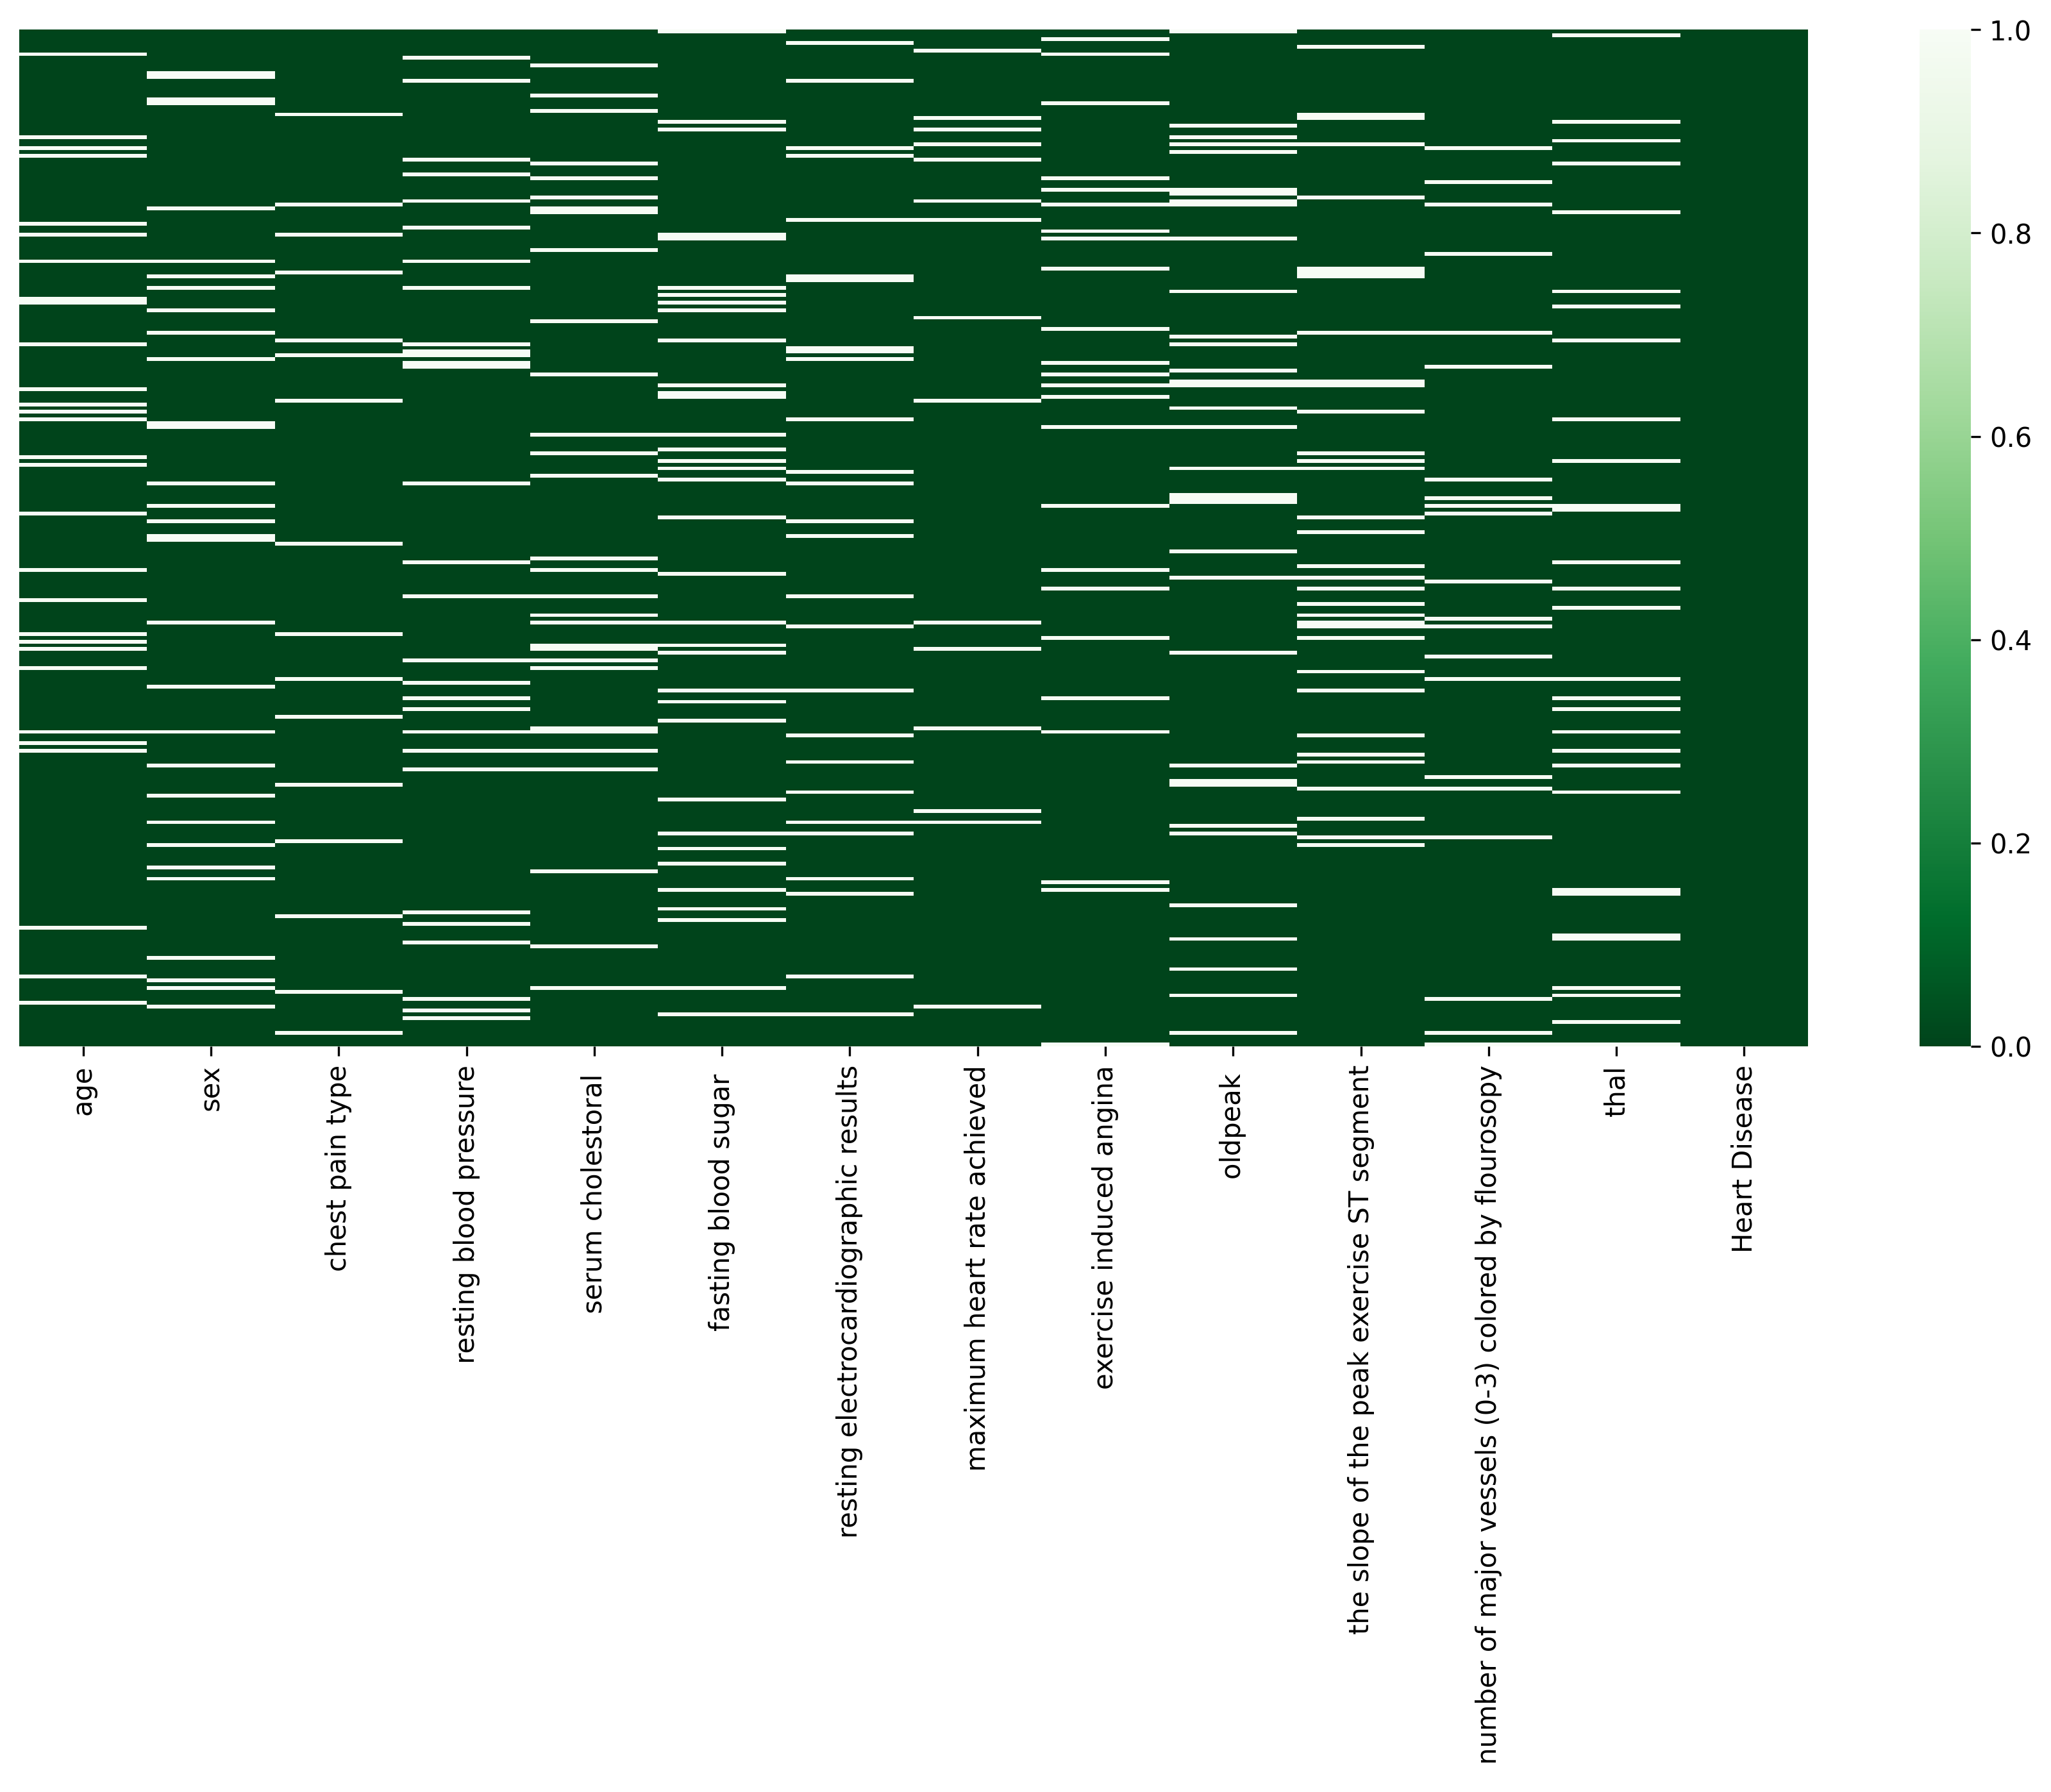

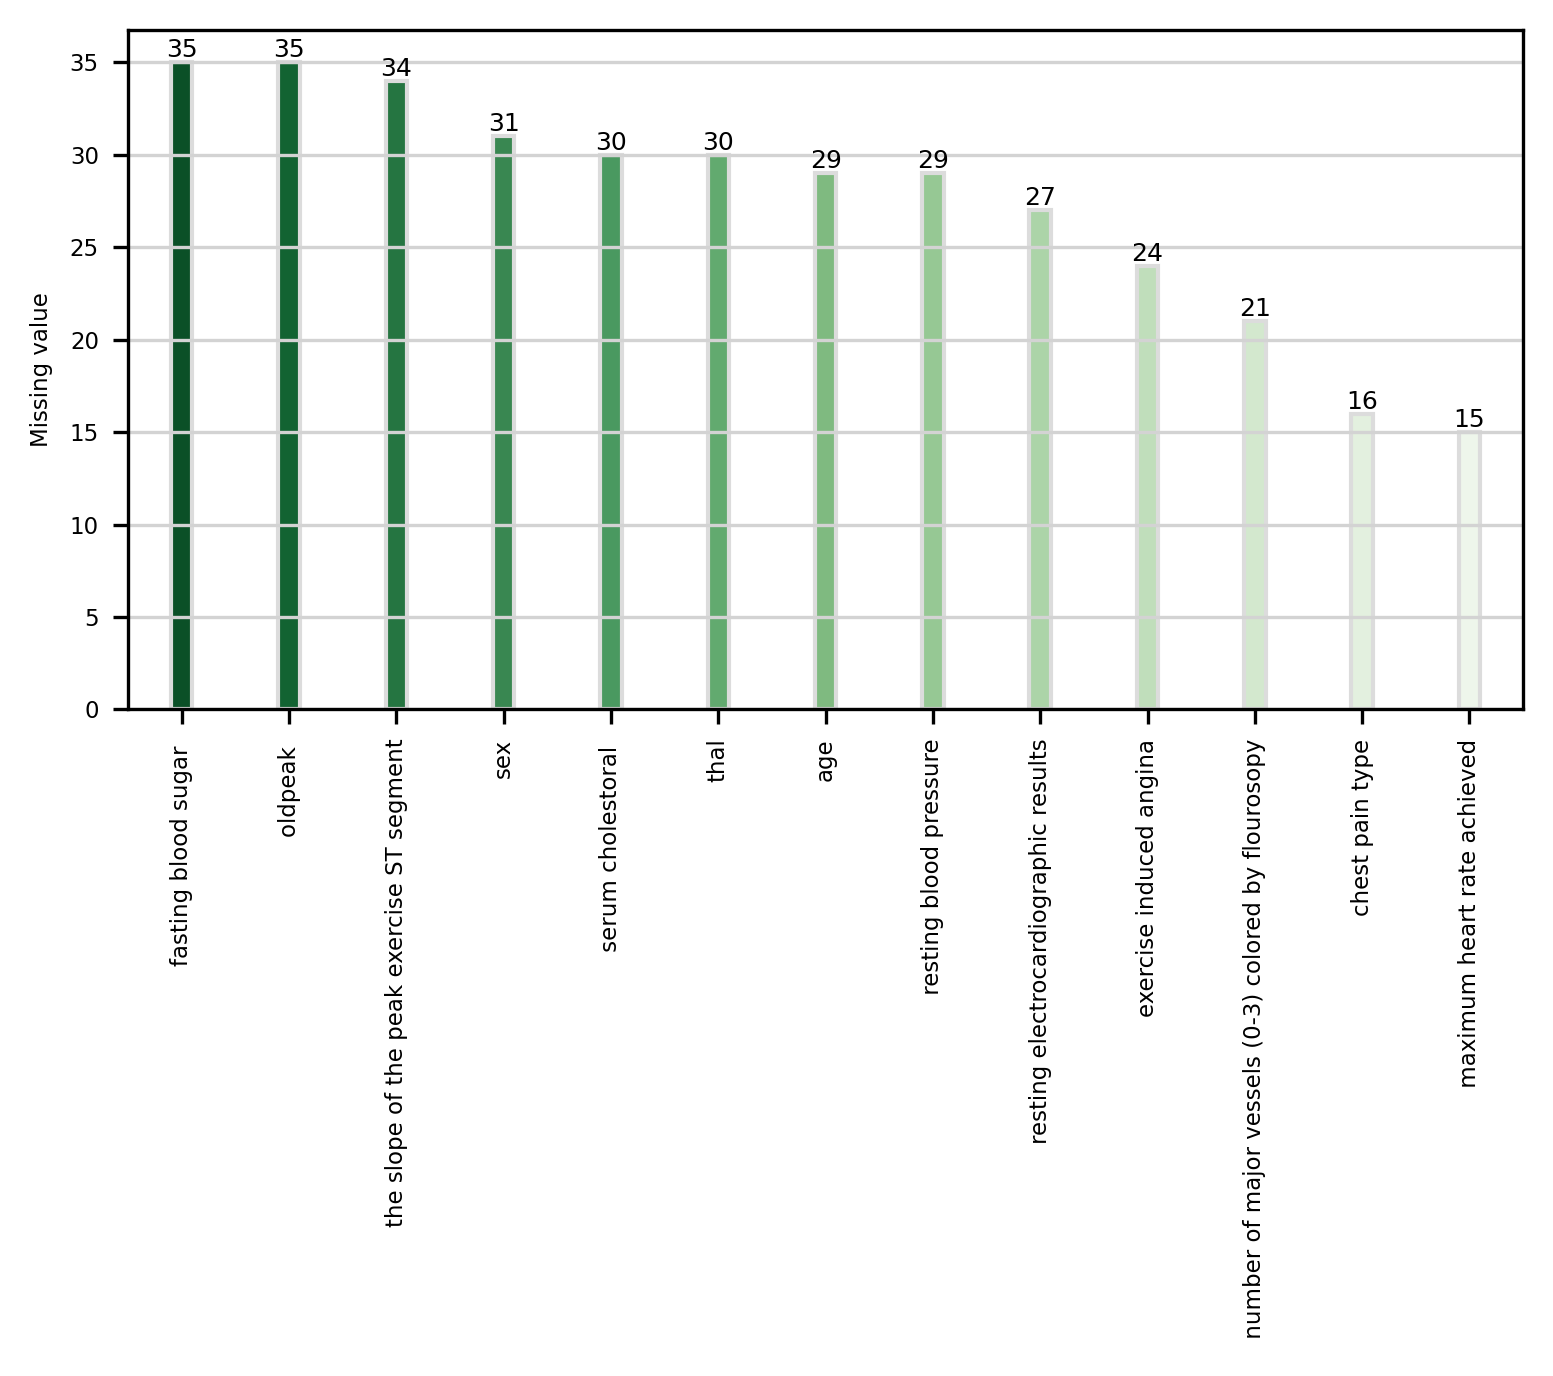

finding similar columns and tables to entity dataframe      fasting blood sugar   oldpeak   \
0                     NaN       NaN   
1                     0.0       1.6   
2                     0.0       0.3   
3                     0.0       0.2   
4                     0.0       0.2   
..                    ...       ...   
265                   1.0       0.5   
266                   0.0       NaN   
267                   0.0       1.3   
268                   0.0       0.4   
269                   0.0       1.5   

     the slope of the peak exercise ST segment  sex   serum cholestoral   \
0                                          1.0  1.0                322.0   
1                                          1.0  1.0                234.0   
2                                          1.0  1.0                261.0   
3                                          2.0  1.0                263.0   
4                                          NaN  1.0                269.0   
..                  

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 1287.26it/s]


all features look clean


0 0.8209650680243005
scanning missing values


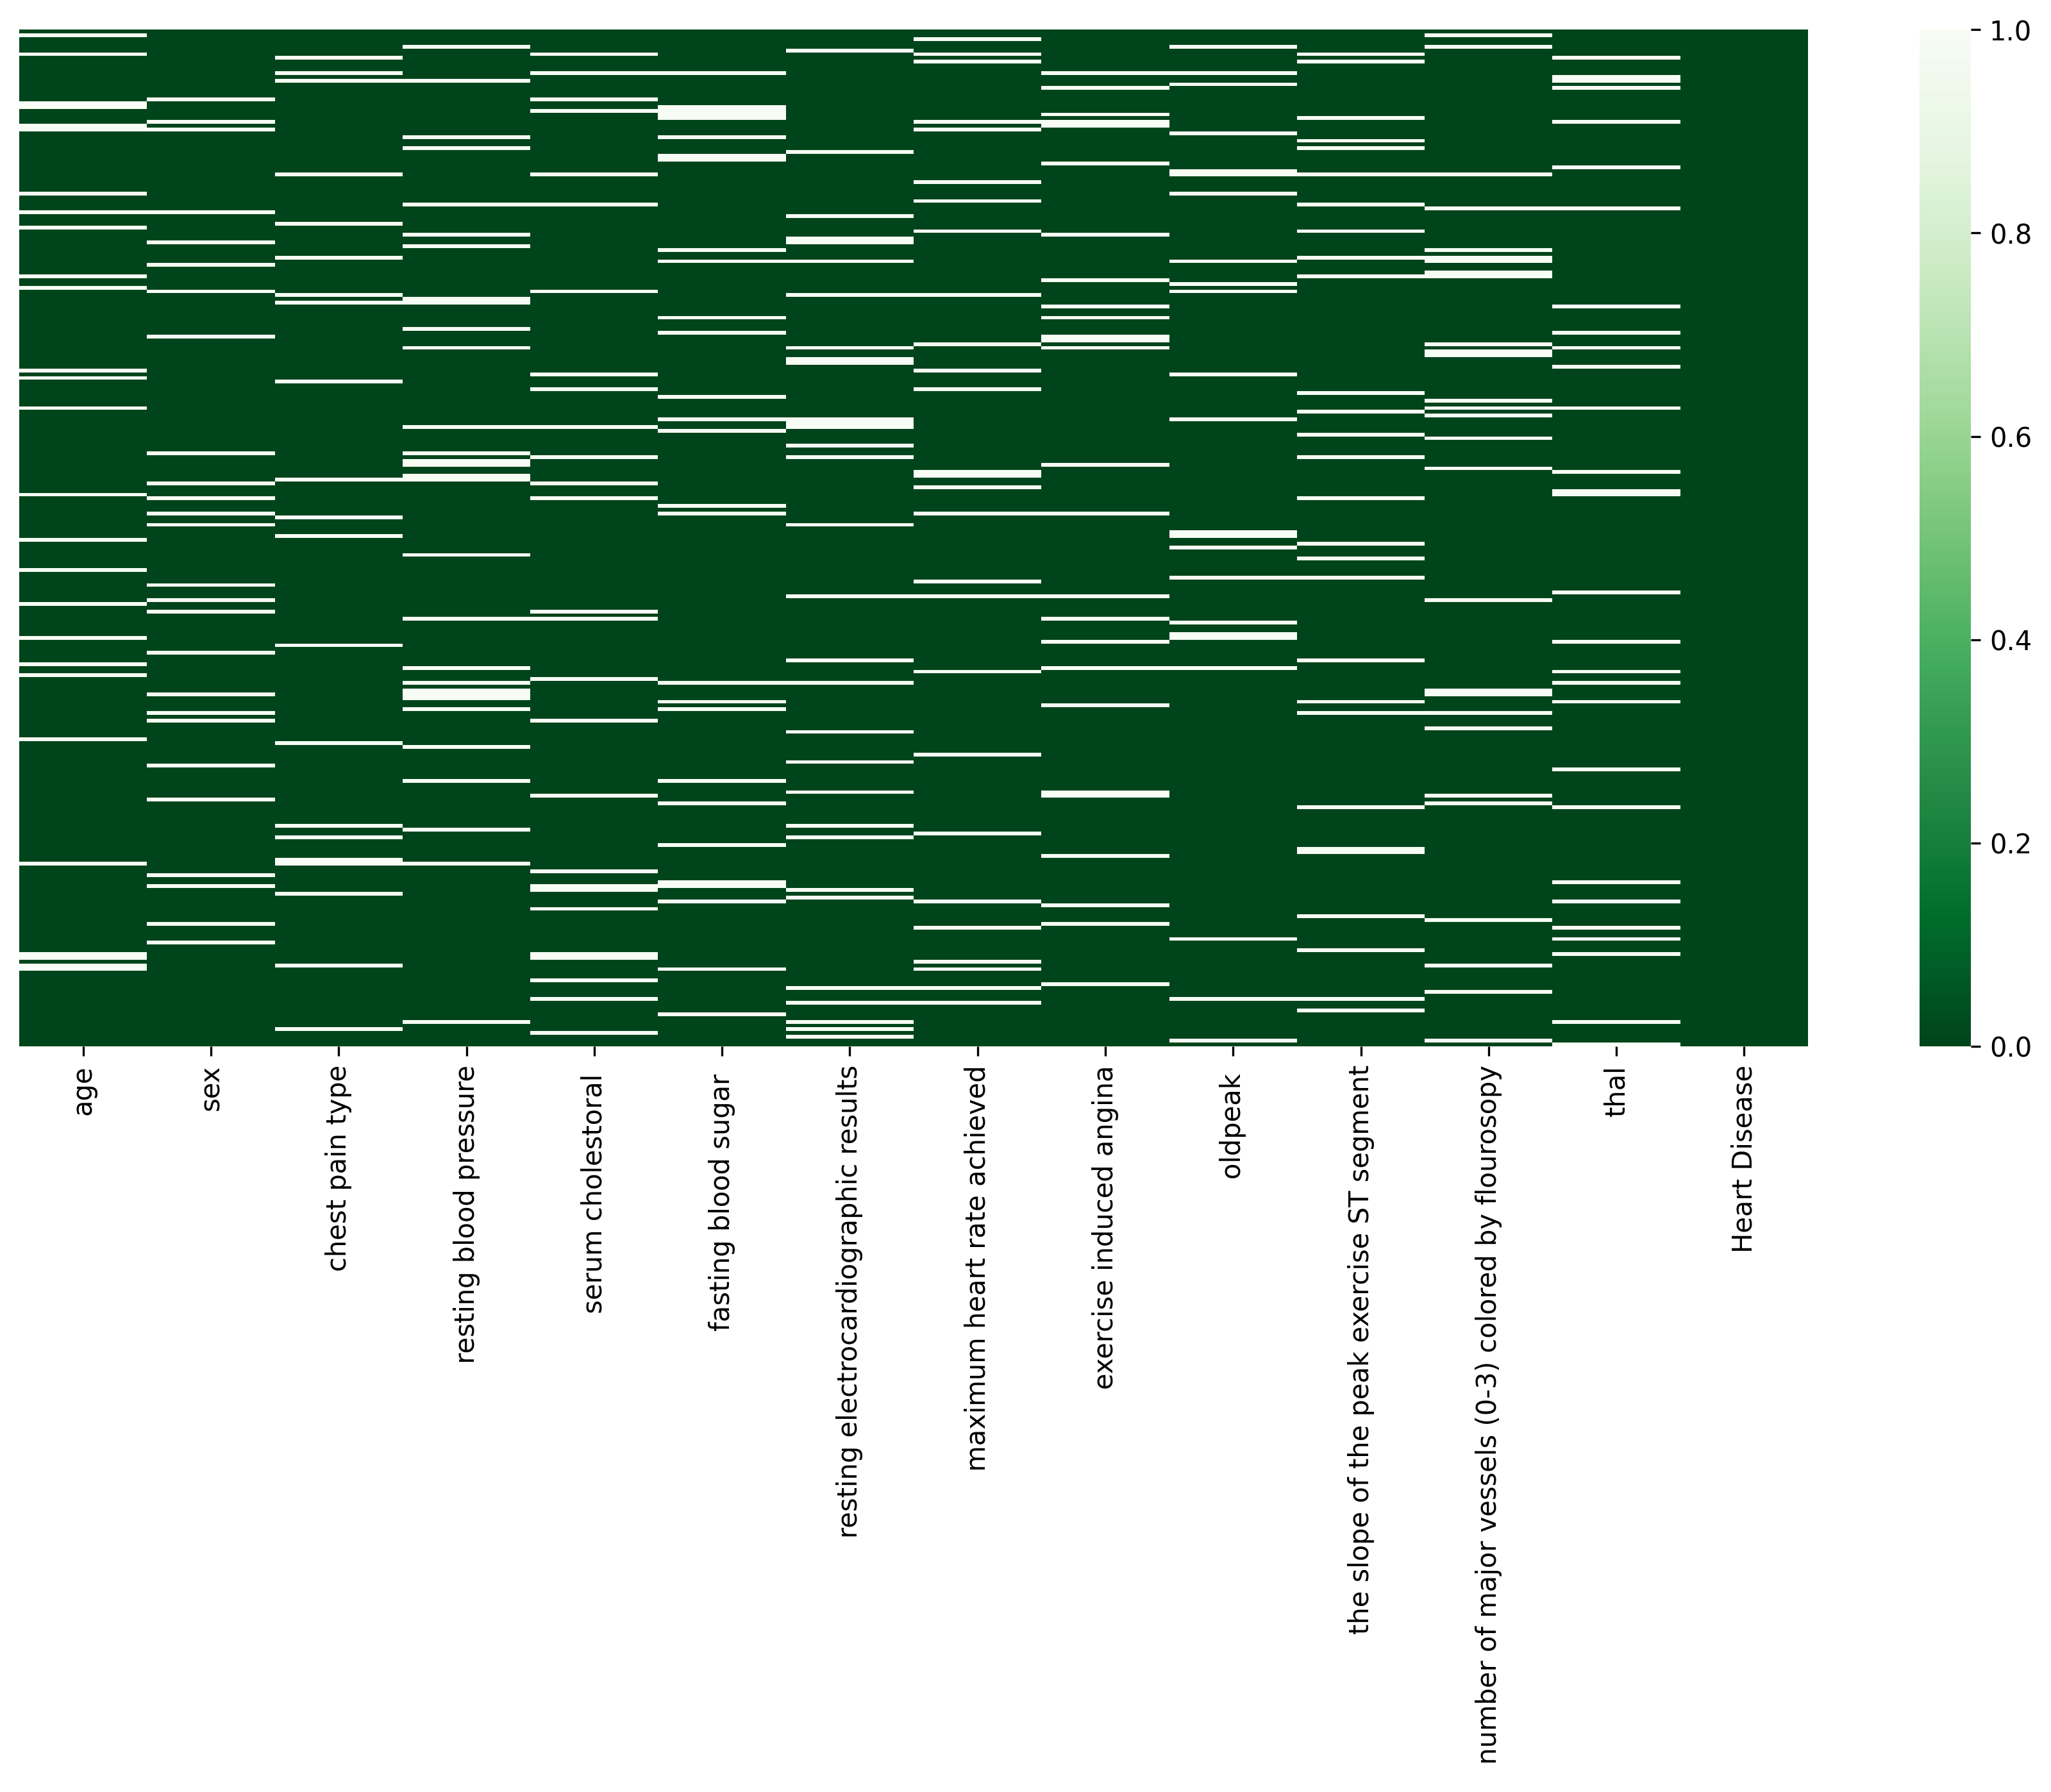

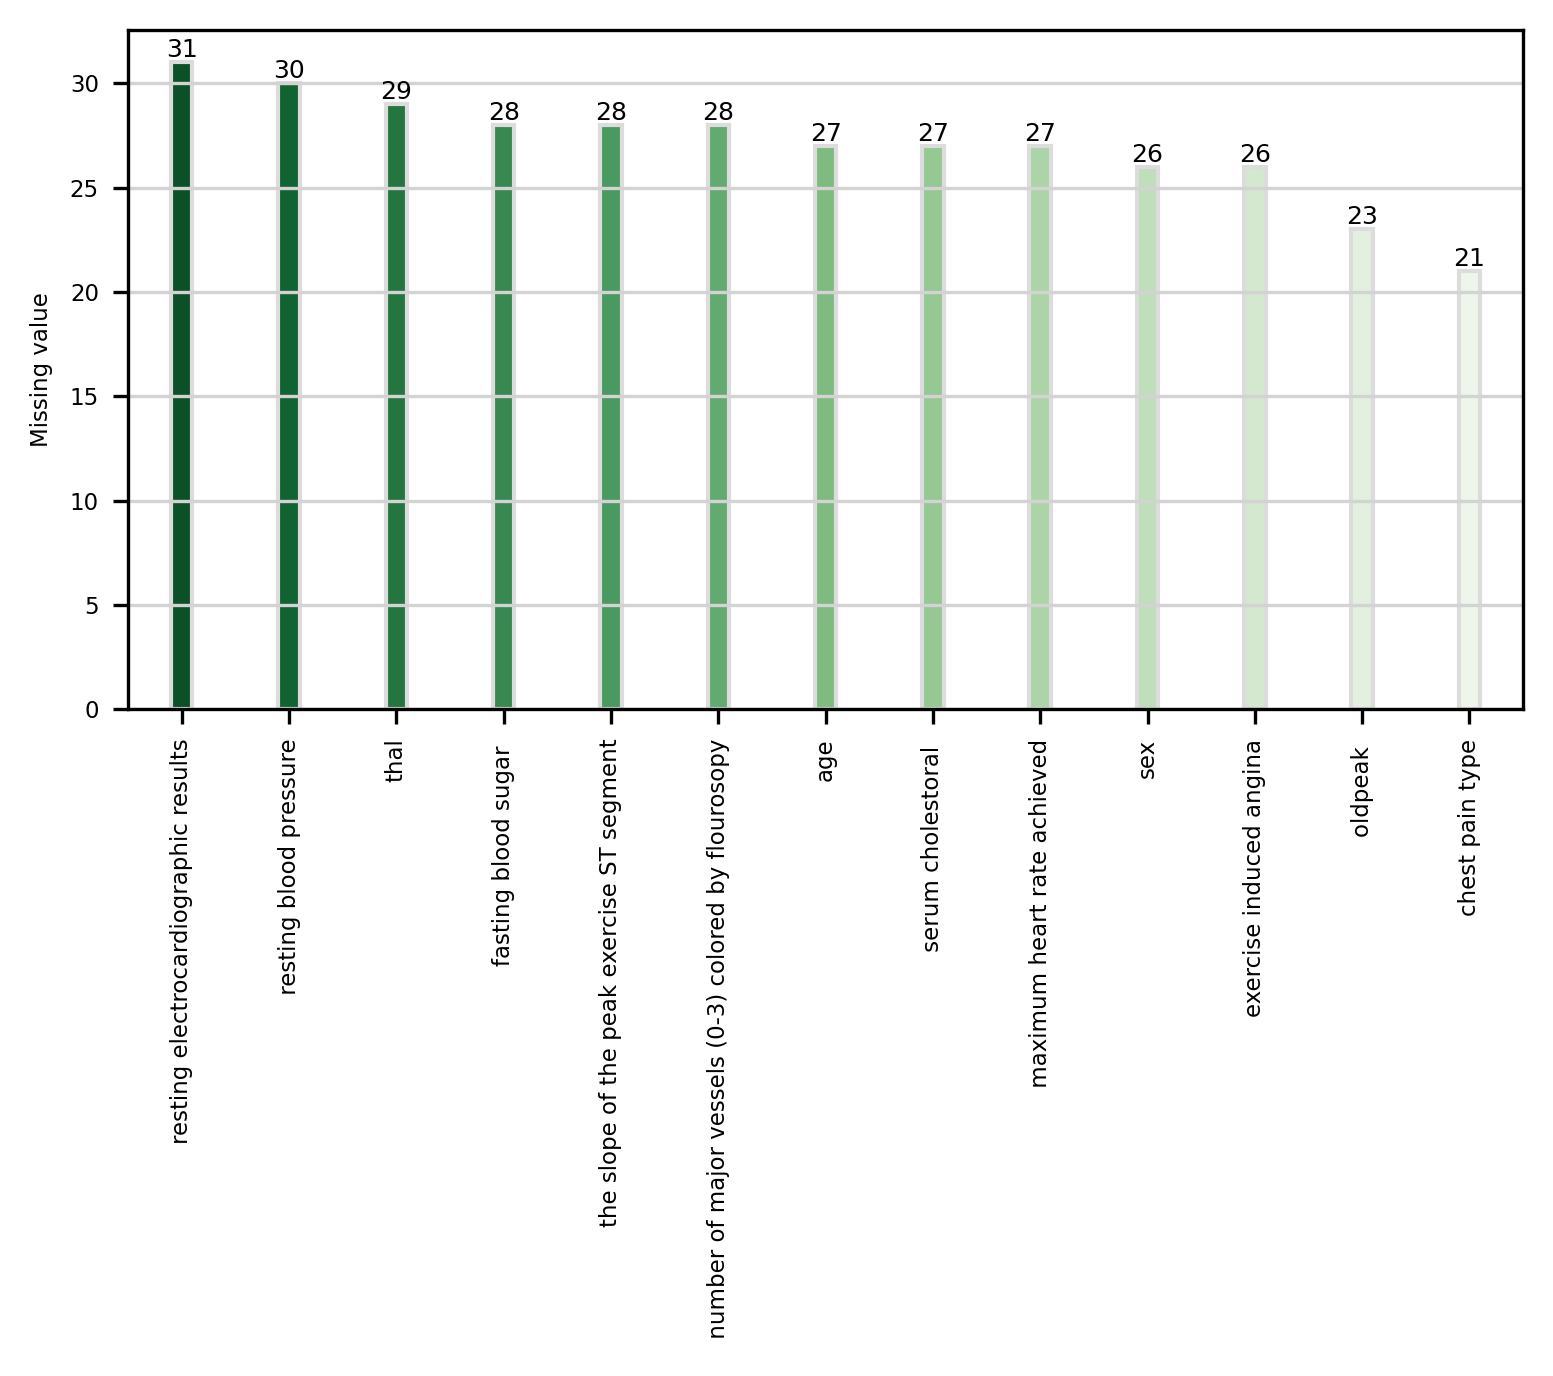

finding similar columns and tables to entity dataframe      resting electrocardiographic results   resting blood pressure  thal  \
0                                     2.0                    120.0   3.0   
1                                     2.0                    115.0   3.0   
2                                     0.0                    124.0   7.0   
3                                     2.0                    128.0   3.0   
4                                     2.0                      NaN   3.0   
..                                    ...                      ...   ...   
265                                   NaN                    172.0   7.0   
266                                   2.0                    120.0   7.0   
267                                   NaN                    120.0   3.0   
268                                   0.0                    140.0   6.0   
269                                   2.0                    160.0   NaN   

     fasting blood sugar   the s

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2087.68it/s]


all features look clean


1 0.8193236124687736
scanning missing values


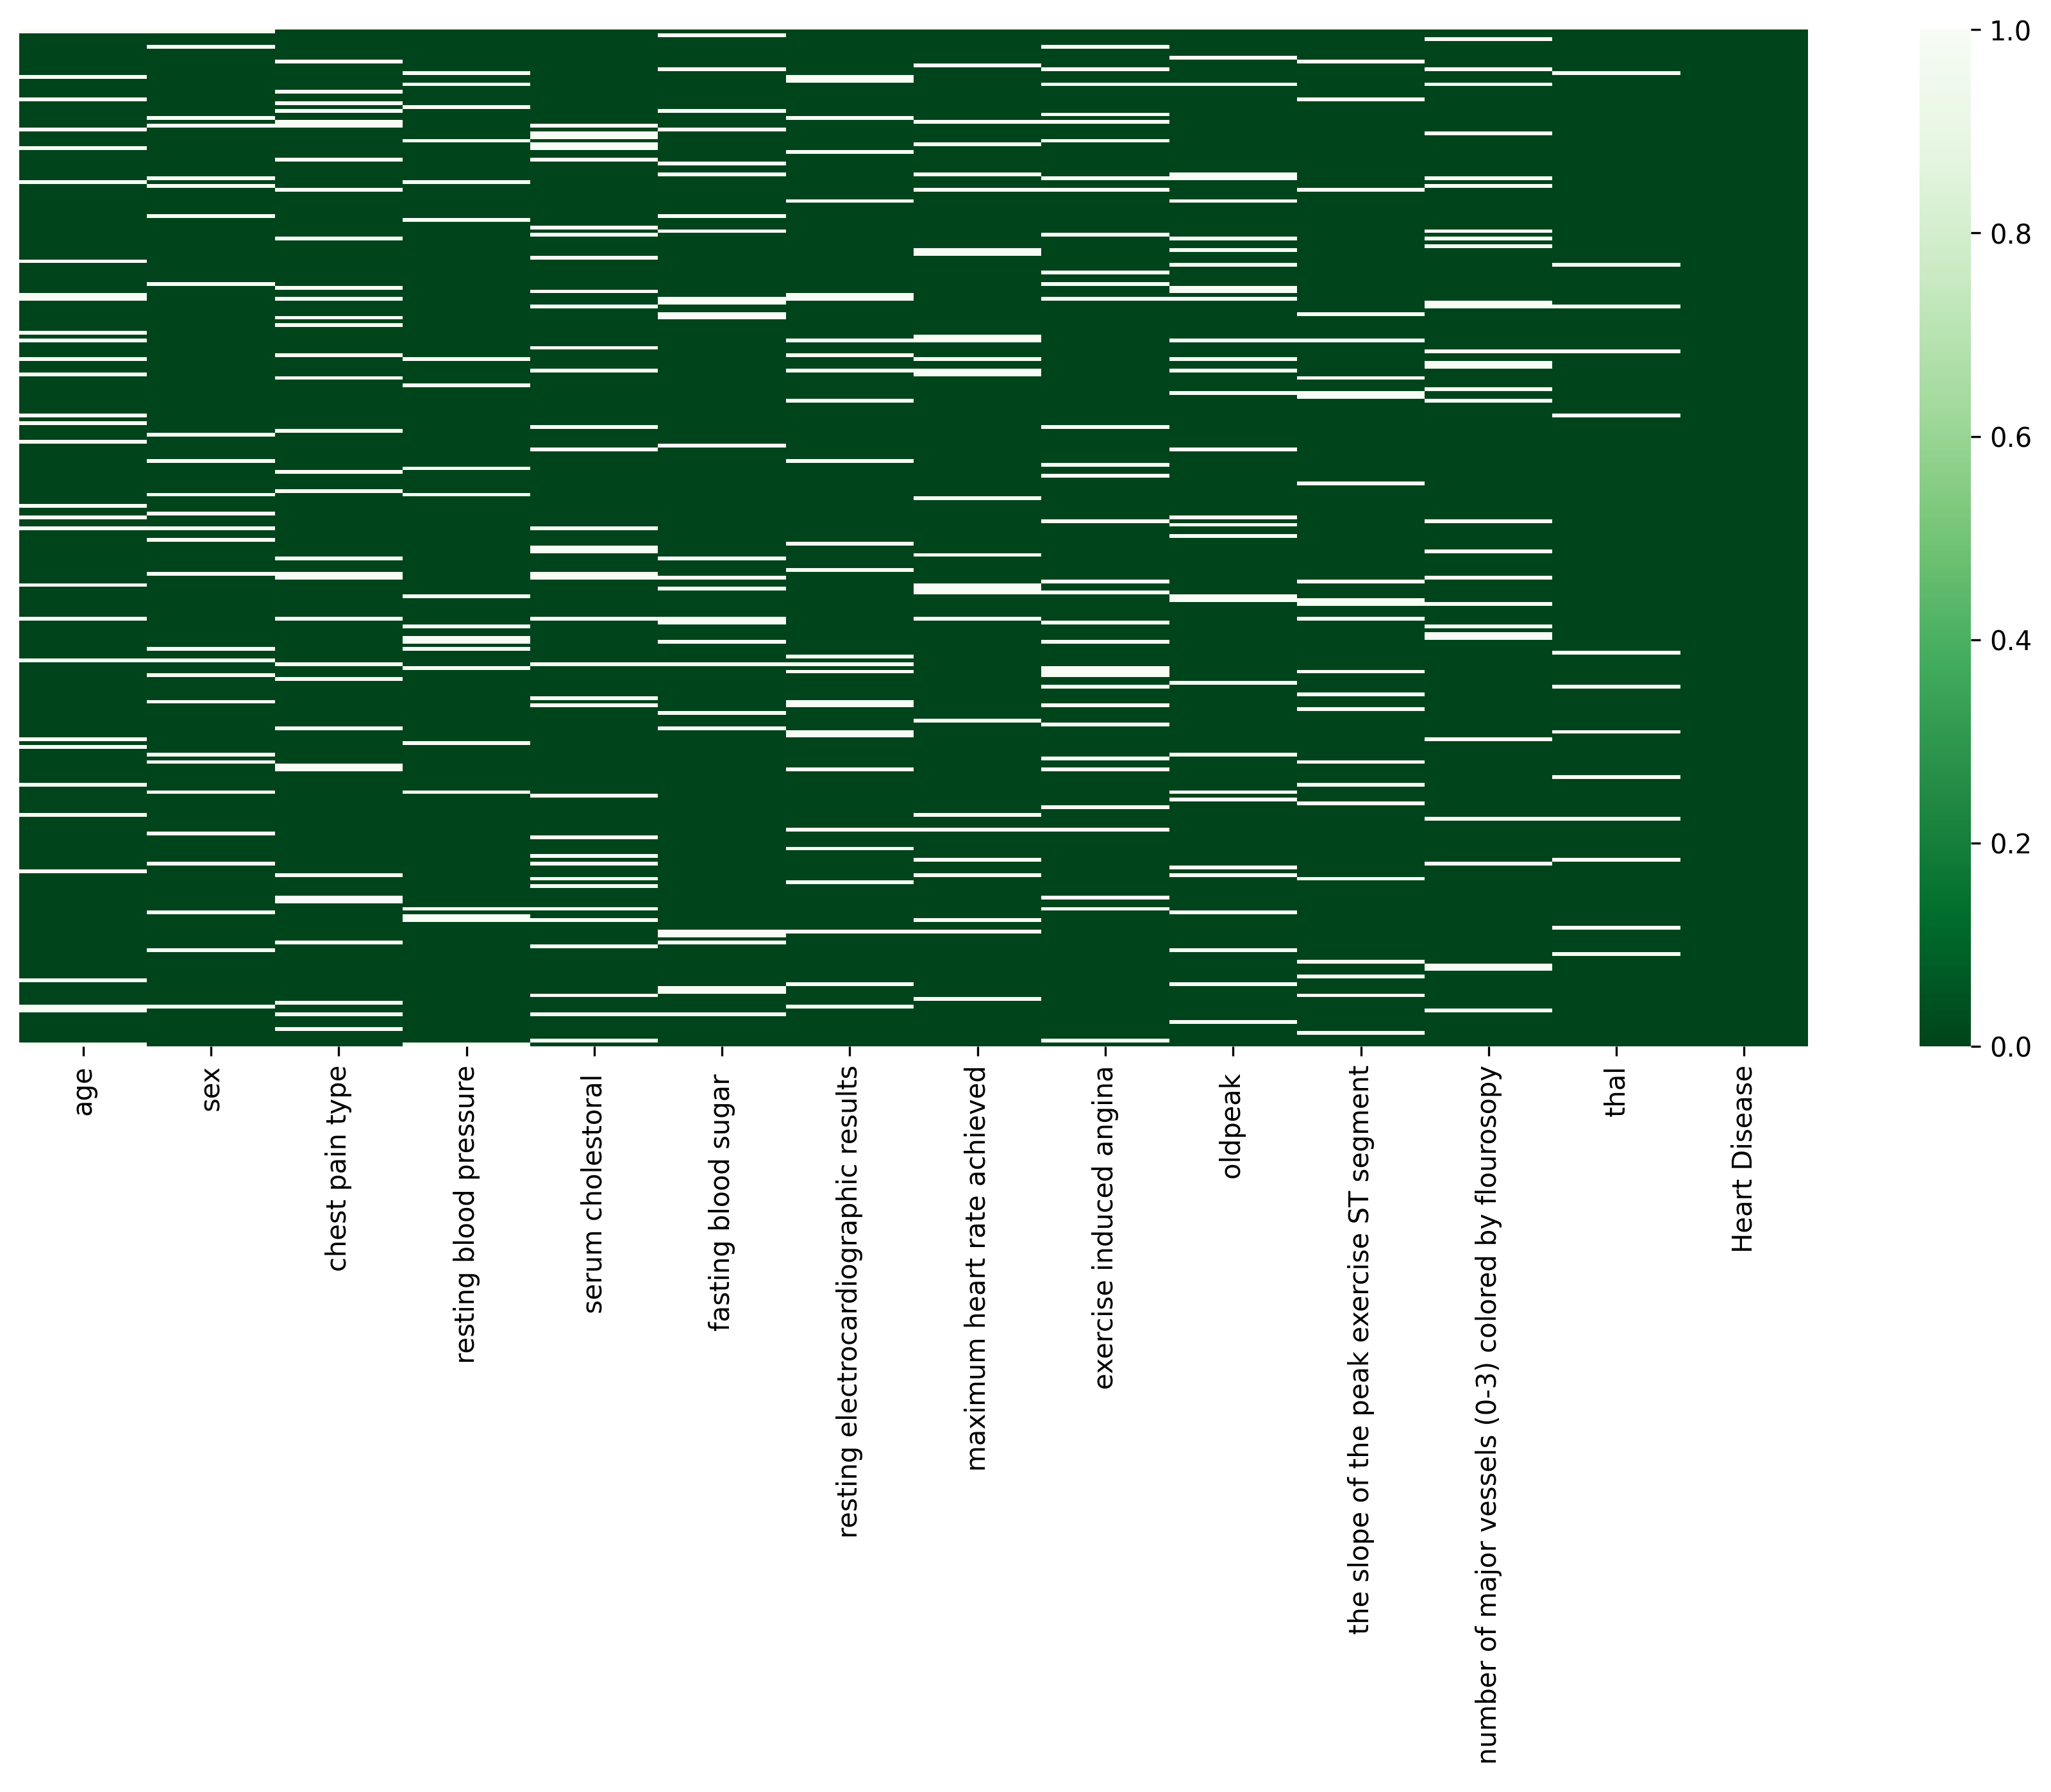

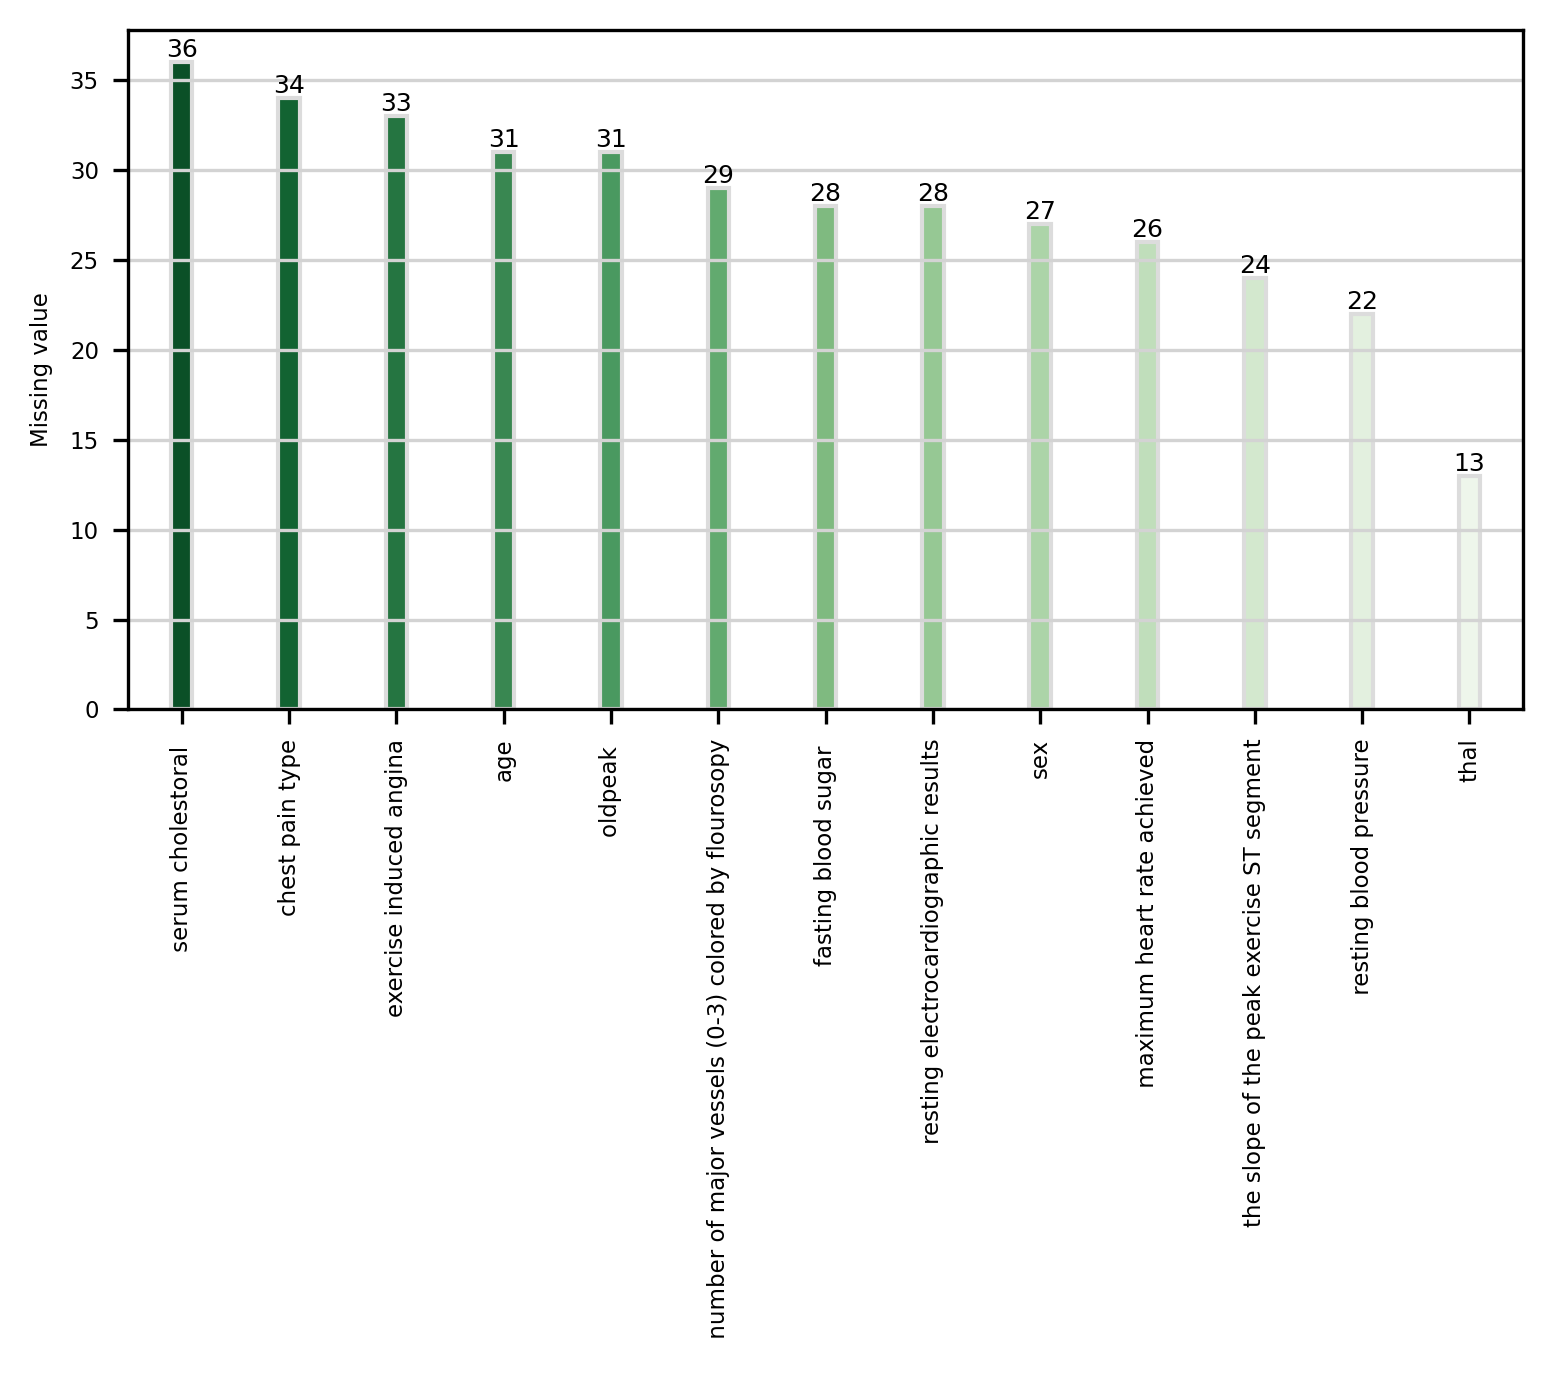

finding similar columns and tables to entity dataframe       serum cholestoral   chest pain type  exercise induced angina   age  \
0                  322.0              4.0                      0.0   NaN   
1                  234.0              3.0                      0.0  54.0   
2                  261.0              4.0                      0.0  57.0   
3                  263.0              4.0                      1.0  64.0   
4                  269.0              2.0                      NaN  74.0   
..                   ...              ...                      ...   ...   
265                199.0              NaN                      0.0  52.0   
266                234.0              4.0                      0.0  54.0   
267                294.0              2.0                      0.0  56.0   
268                  NaN              4.0                      NaN  54.0   
269                234.0              4.0                      0.0   NaN   

     oldpeak    number of major 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2599.32it/s]


all features look clean


2 0.8093372654957423
scanning missing values


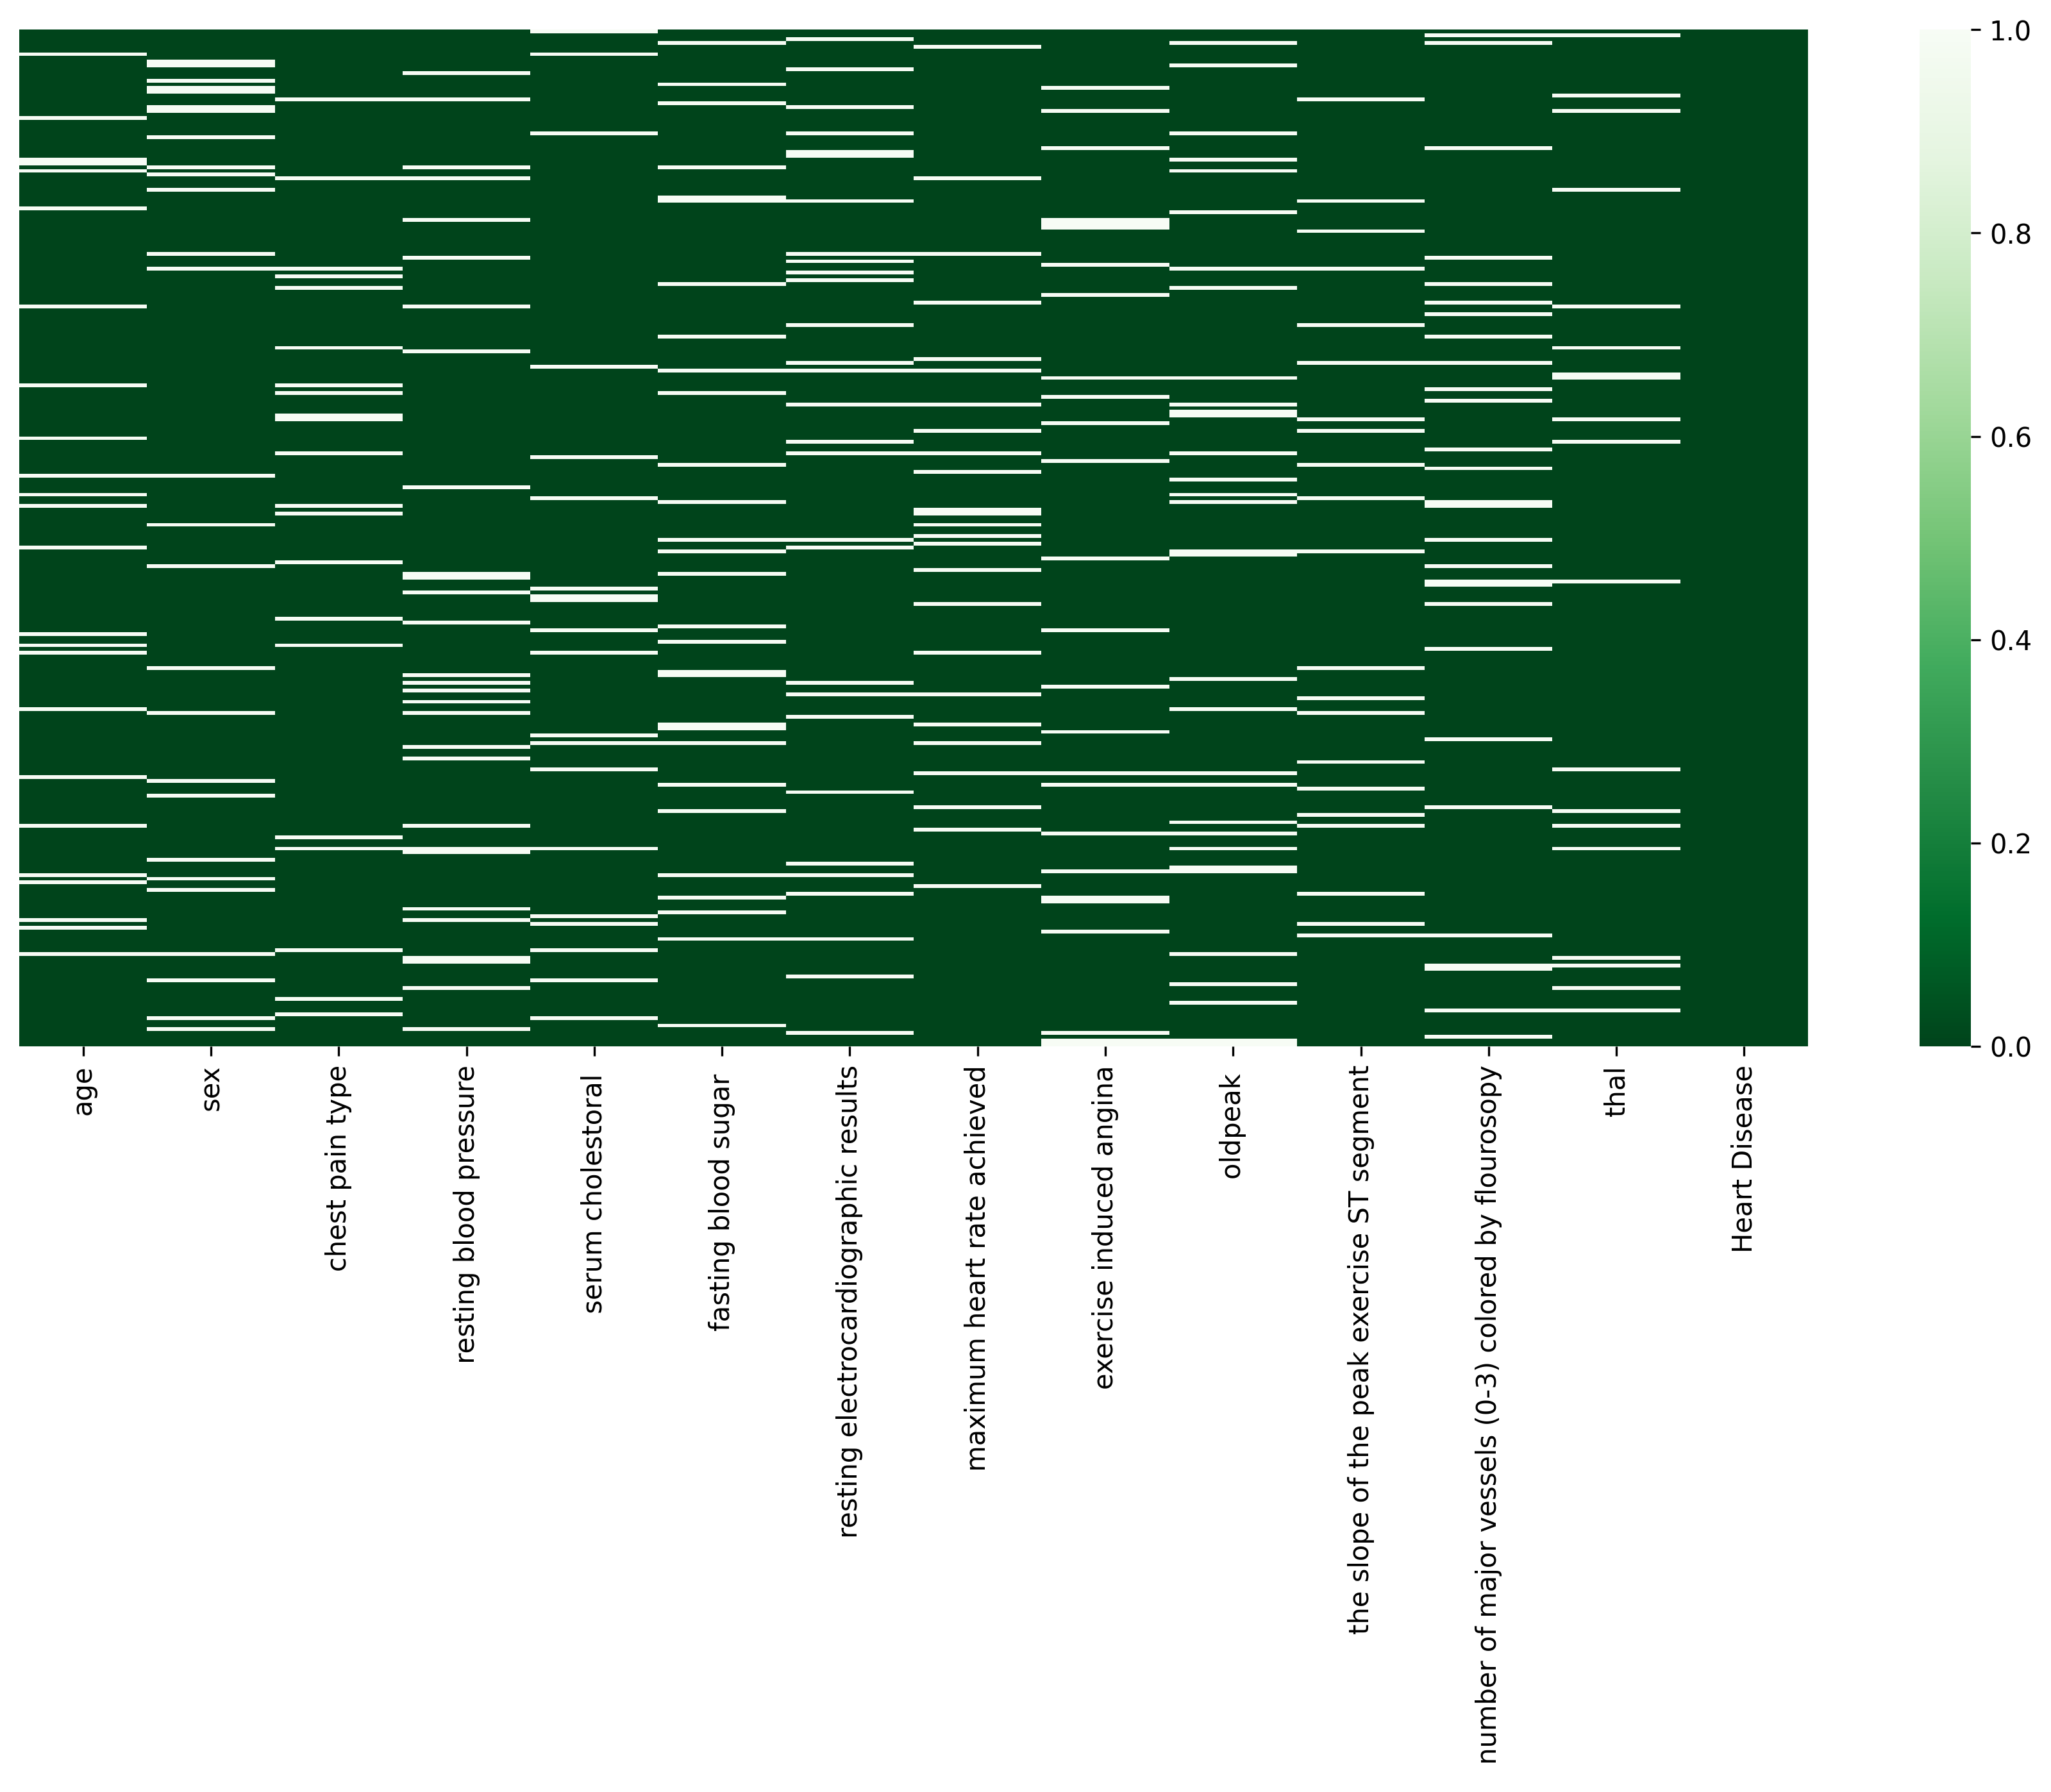

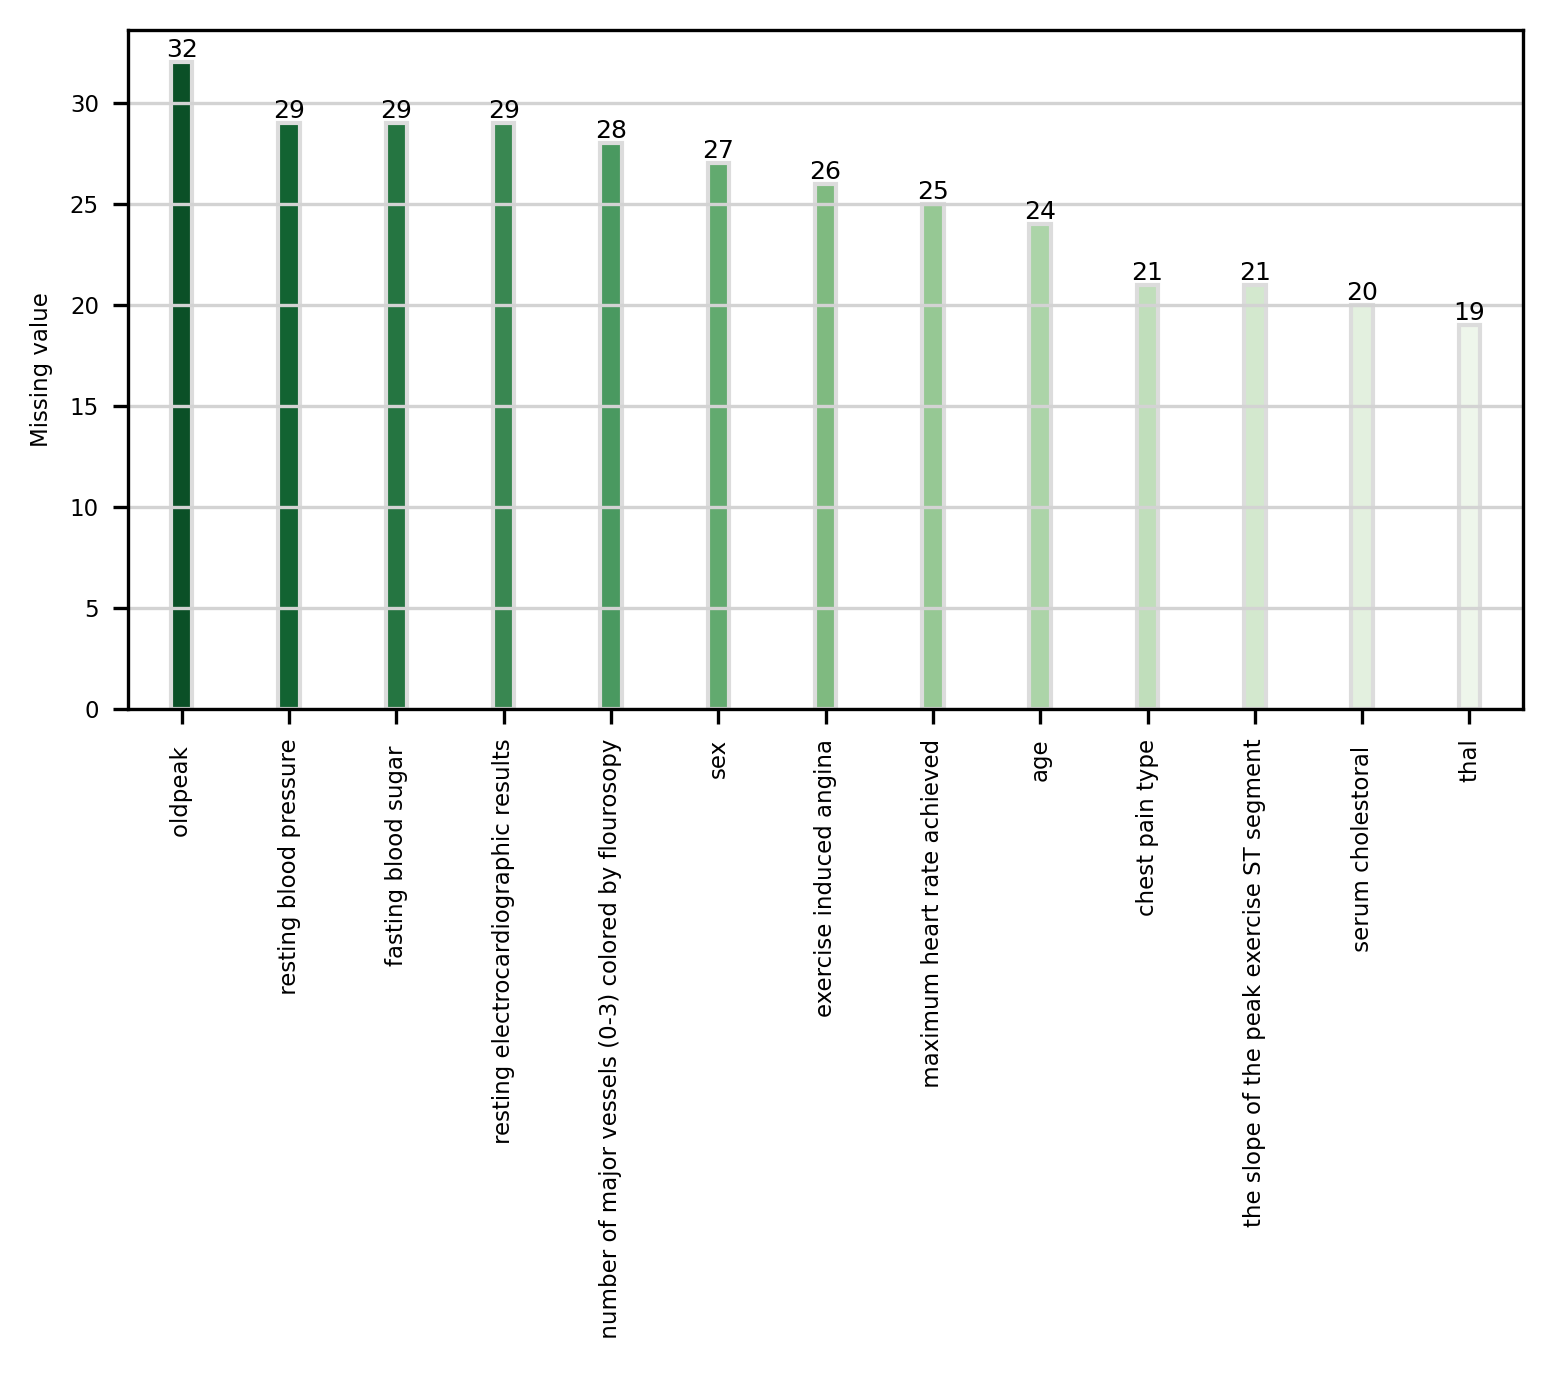

finding similar columns and tables to entity dataframe      oldpeak    resting blood pressure  fasting blood sugar   \
0         0.0                    120.0                   0.0   
1         1.6                    115.0                   0.0   
2         0.3                    124.0                   0.0   
3         NaN                    128.0                   NaN   
4         0.0                    120.0                   0.0   
..        ...                      ...                   ...   
265       0.5                      NaN                   1.0   
266       0.0                    120.0                   0.0   
267       1.3                    120.0                   0.0   
268       NaN                    140.0                   0.0   
269       NaN                    120.0                   0.0   

     resting electrocardiographic results  \
0                                     2.0   
1                                     2.0   
2                                     NaN

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2166.14it/s]


all features look clean


3 0.7876203778609229
scanning missing values


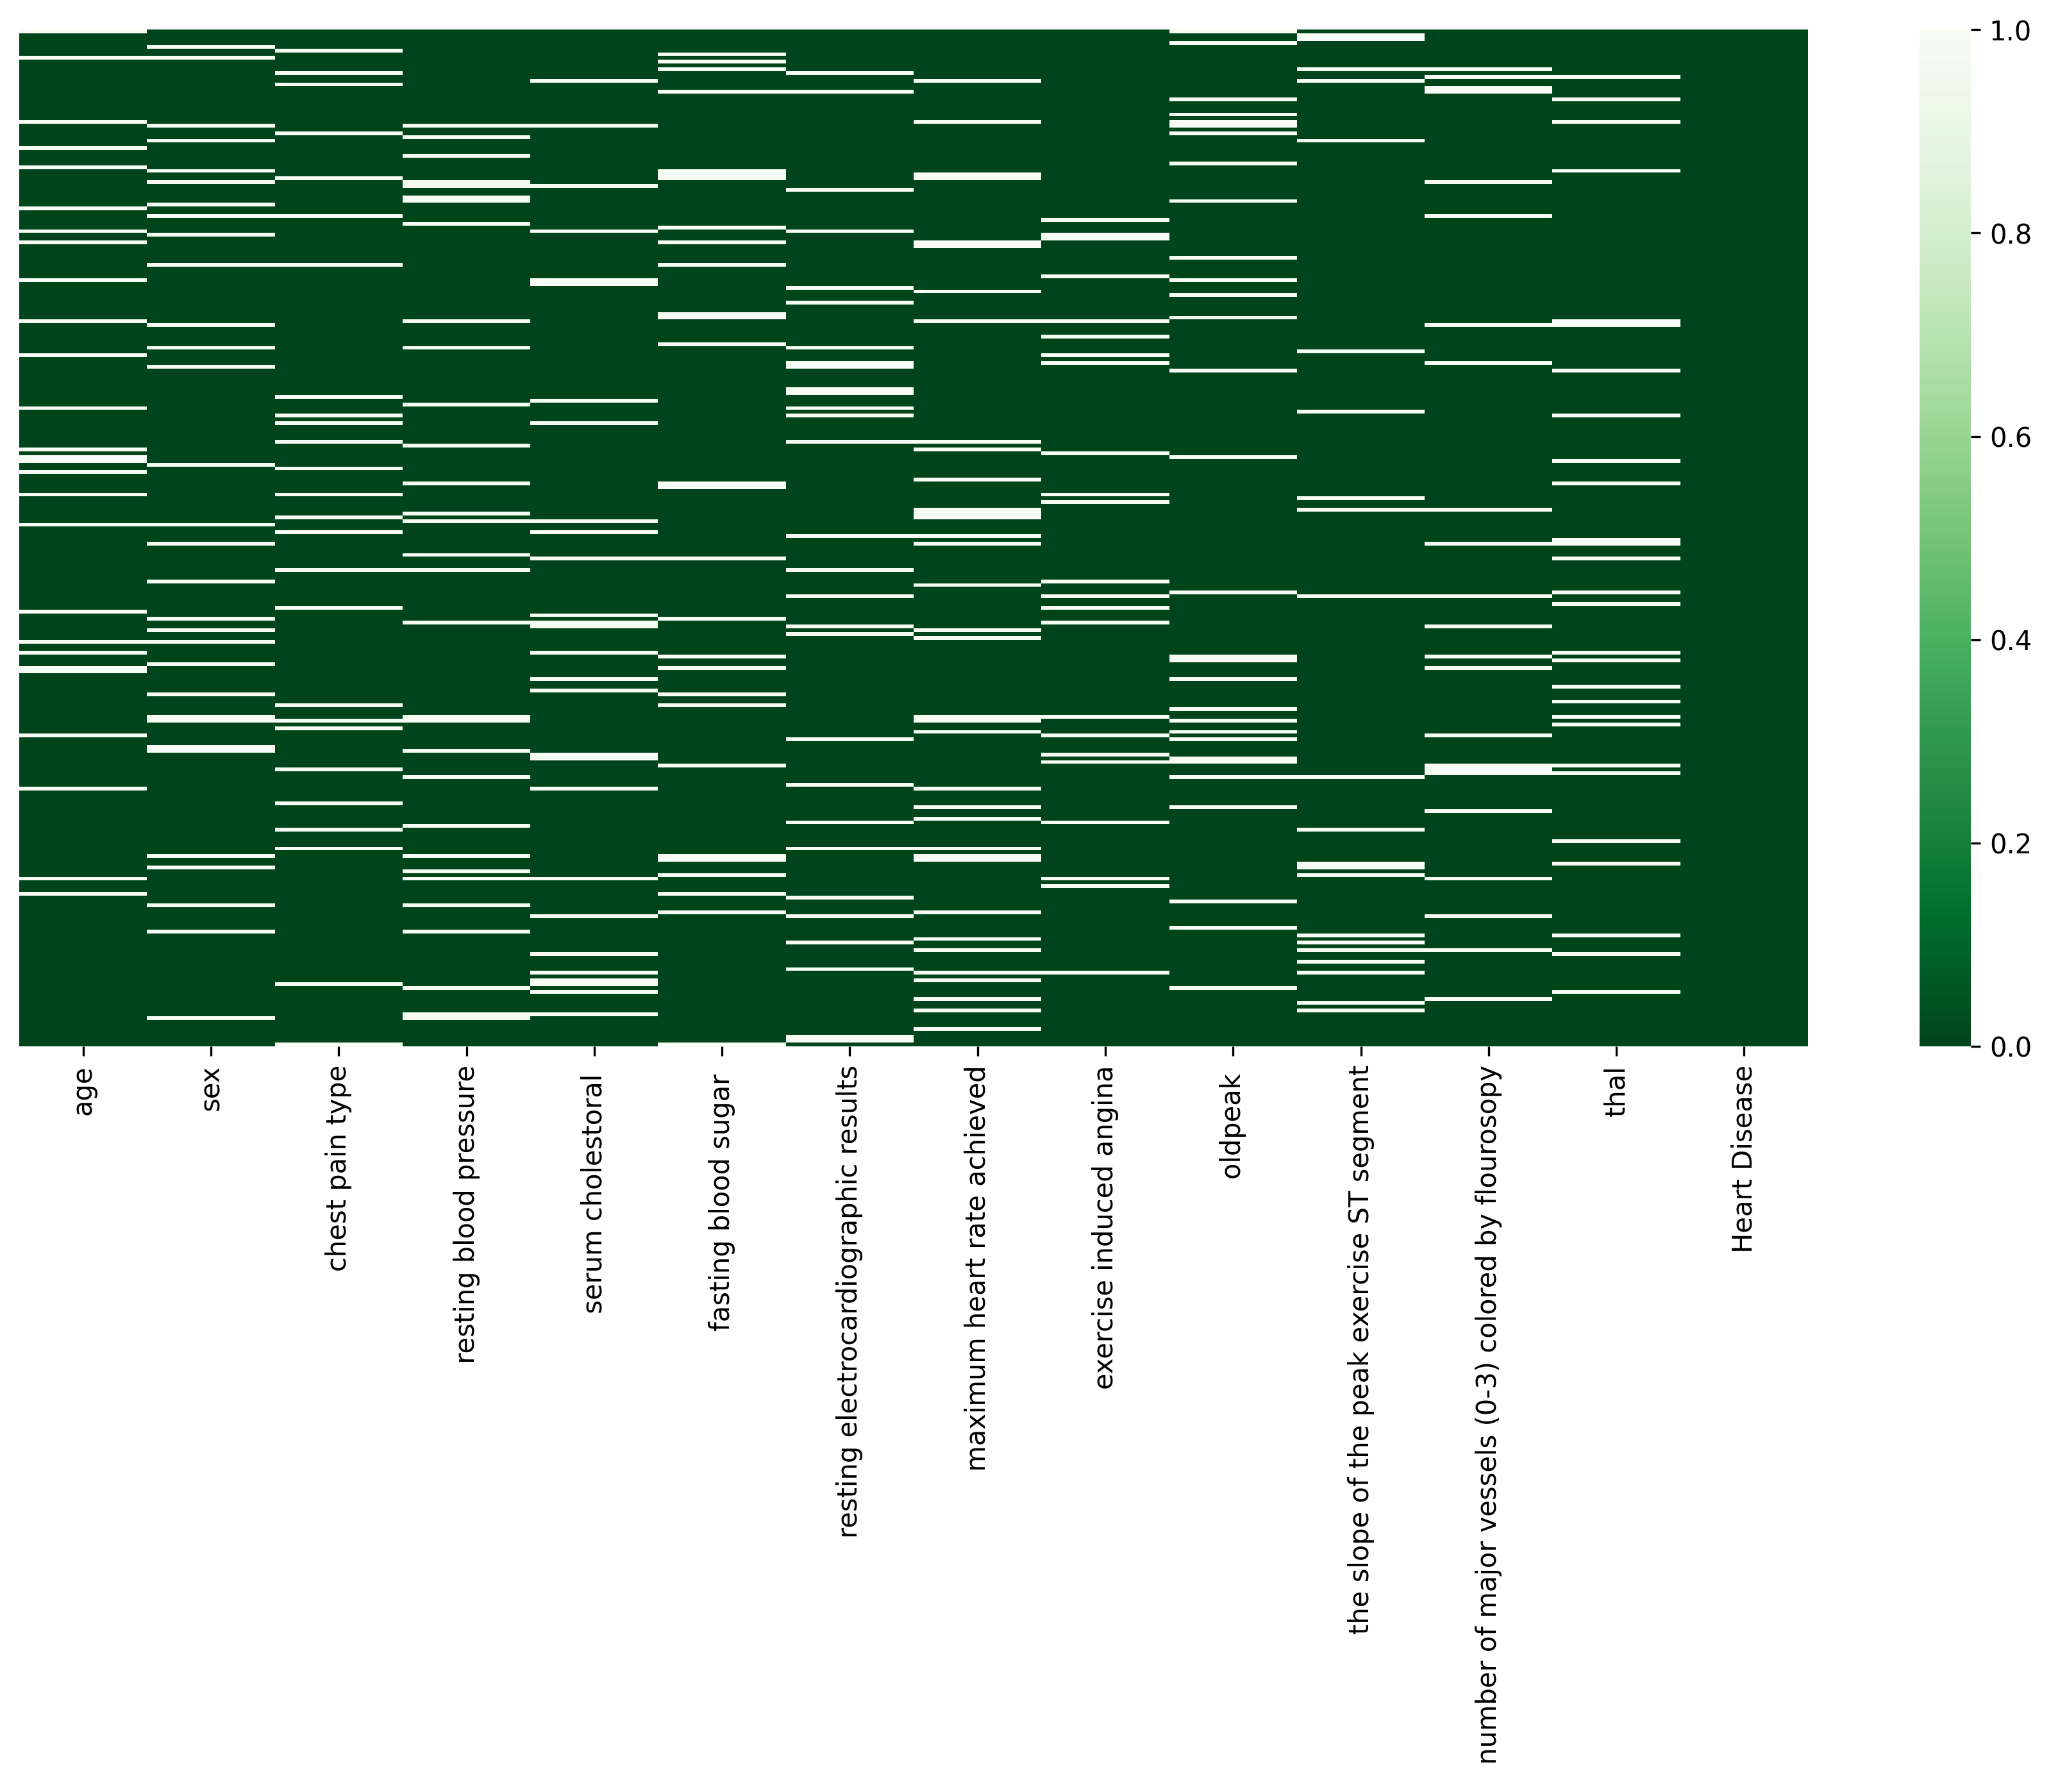

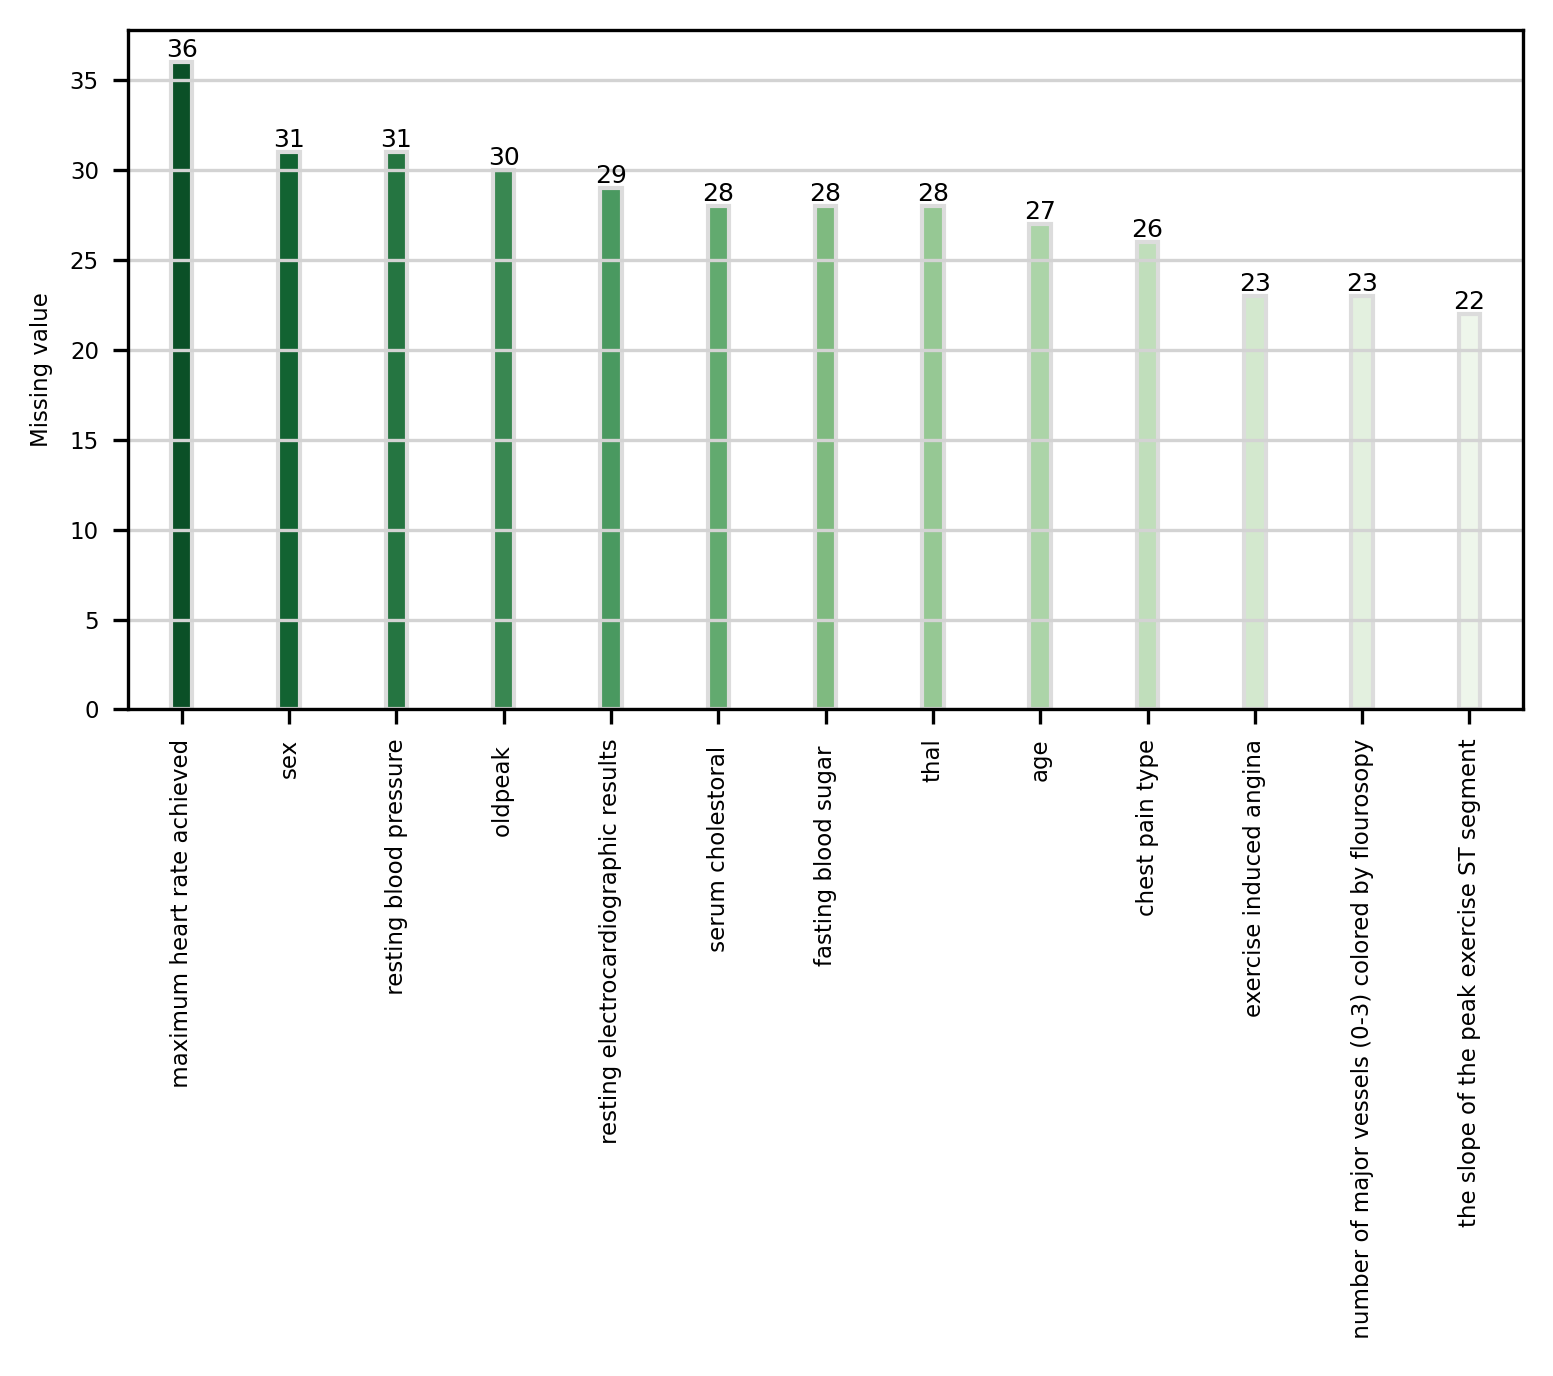

finding similar columns and tables to entity dataframe       maximum heart rate achieved  sex   resting blood pressure  oldpeak   \
0                           109.0  1.0                    120.0       NaN   
1                           160.0  1.0                    115.0       1.6   
2                           162.0  1.0                    124.0       0.3   
3                           105.0  1.0                    128.0       NaN   
4                           162.0  NaN                    120.0       0.0   
..                            ...  ...                      ...       ...   
265                           NaN  1.0                    120.0       0.5   
266                         173.0  1.0                    120.0       0.0   
267                         153.0  0.0                    120.0       1.3   
268                         162.0  1.0                    140.0       0.0   
269                         108.0  1.0                    120.0       0.0   

     resting electro

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 2599.20it/s]


all features look clean


4 0.7863478087159629


In [9]:
for i in range(0,5):
    df = r
    # Generate a mask for missing values
    mask = np.random.rand(df.shape[0], df.shape[1]) < proportion_missing
    
    # Select the column you want to exclude from the MCAR mechanism
    excluded_column = 'Heart Disease'
    
    # Generate a mask for missing values for all columns except for the excluded one
    mask = np.random.rand(df.shape[0], df.shape[1]) < proportion_missing
    mask[:, df.columns.get_loc(excluded_column)] = False
    
    # Apply the mask to the dataset and convert the resulting NaNs to actual missing values
    df[mask] = np.nan
    
    # Ask for Cleaning
    cl = kgfarm.recommend_cleaning_operations(df)
    
    # Clean
    df = kgfarm.clean(df,cl)
    
    # ML
    dependent_variable = 'Heart Disease'
    independent_variables = [feature for feature in list(df.columns) if feature != dependent_variable]
    
    X = df[independent_variables]
    y = df[dependent_variable]
    
    clf = svm.SVC(kernel='linear', C=1)
    
    scores = cross_val_score(clf, X, y, cv = 10, scoring='f1').mean()
    print(i,scores)
    f1array.append(scores)

In [10]:
f1array

[0.8209650680243005,
 0.8193236124687736,
 0.8093372654957423,
 0.7876203778609229,
 0.7863478087159629]

In [ ]:
cl = kgfarm.recommend_cleaning_operations(df)

In [ ]:
df = kgfarm.clean(df,cl)

In [ ]:
dependent_variable = 'Heart Disease'
independent_variables = [feature for feature in list(df.columns) if feature != dependent_variable]

X = df[independent_variables]
y = df[dependent_variable]

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=1000)
lrc = LogisticRegression()

In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(lrc, X, y, cv = 10, scoring='f1').mean()
scores